In [1]:
import os
import tarfile
from six.moves import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# download csv file and place it in the download directory
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


In [2]:
import pandas as pd

# use pandas to read housing data from csv file
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
# examine top 5 rows
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
# description of data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


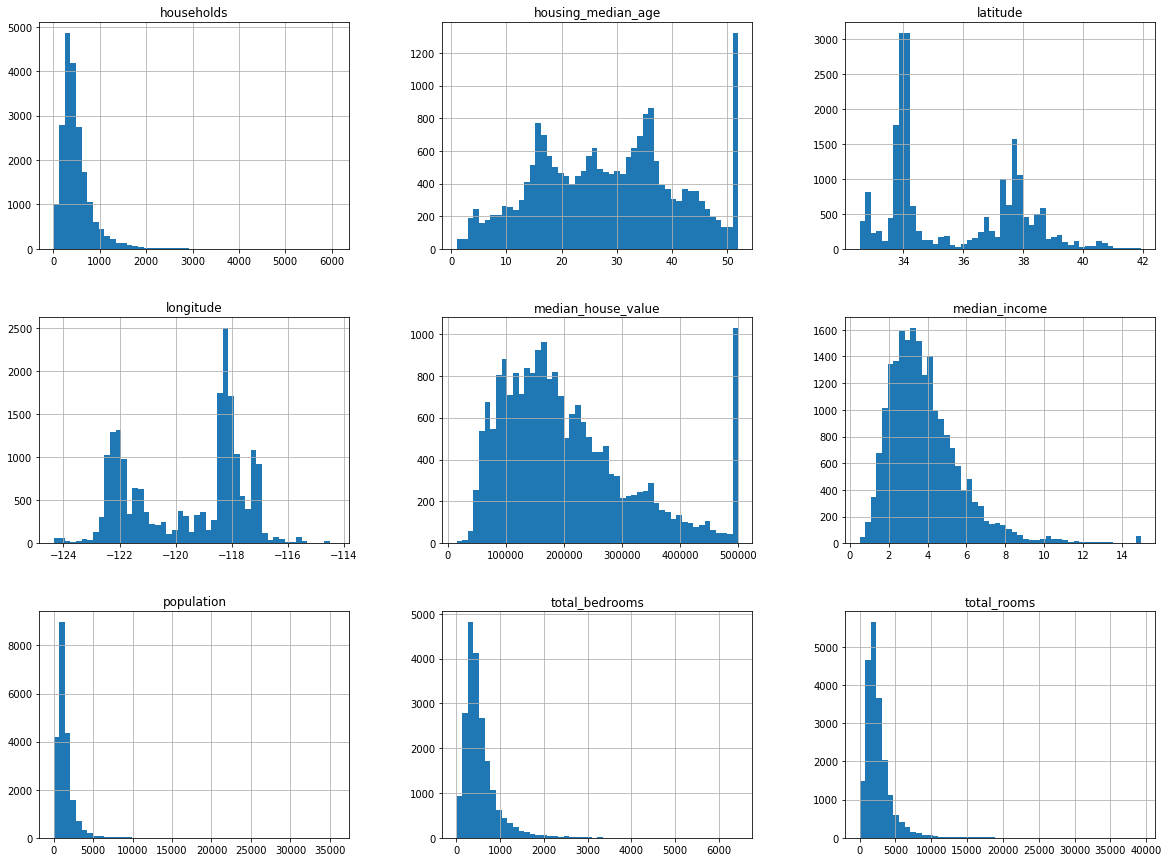

In [7]:
#only in a jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
import numpy as np

def split_train_test(data, test_ratio):
    # permute the dataset (by index: 0 to size of data)
    shuffled_indices = np.random.permutation(len(data))
    # size of the test set is determined by value of test ratio (eg .2 = 20%)
    test_set_size = int(len(data) * test_ratio)
    # create two lists containing from our complete data set based on the size of test set
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    # return lists of data associated indices of the two lists
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [10]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    # return takes the last byte of hashed identifier and returns true or false based on the size
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    
    # dataframe.apply to filter down the list of ids. check whether the id falls under test set
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    
    return data.loc[~in_test_set], data.loc[in_test_set]
    


In [11]:
# add index as column
housing_with_id = housing.reset_index()
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")


In [12]:
print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


In [13]:
from sklearn.model_selection import train_test_split

# use scikit-learn function for splitting data
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)



In [14]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [15]:
# create a new column which groups median_income in certain range
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.where.html
# 5.0 replaces the "other" values that do not match the condition and inplace replaces values in "self"
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

In [16]:
from sklearn.model_selection import StratifiedShuffleSplit

# scikit method for splitting data by categories
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# split method splits the data into test training and test sets. produces dataframes for each dataset 
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

housing["income_cat"].value_counts() / len(housing)
    

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [18]:
housing = strat_train_set.copy()

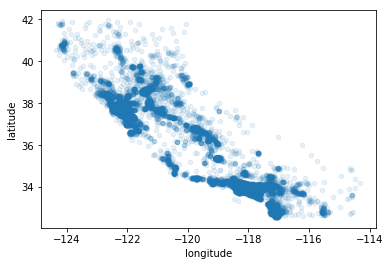

In [19]:
# plotting dataframe
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<function matplotlib.pyplot.legend>

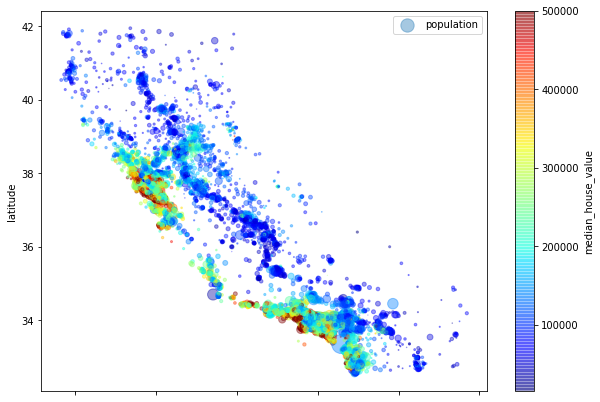

In [38]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
# s = size
# c = color
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s = housing["population"]/100, label = "population", figsize = (10,7),
c = "median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend


In [40]:
# compute standard correlation coefficient (Pearson's r)
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64